In [ ]:
#  E:\MyJPY\Datas\JD商品比价分析

# https://www.kesci.com/mw/project/6013fb40ac79f40016ac9e8b

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(palette="summer",font='Microsoft YaHei',font_scale=1.2)
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'E:\MyJPY\Datas\JD商品比价分析\csvjd.csv',encoding='gbk')
df.shape

(5984, 5)

In [4]:
print('重复值：{}条'.format(df.duplicated().sum()))

重复值：77条


In [5]:
# 空值统计
df.isnull().sum()

price       0
name        0
url         0
comment     0
shopname    0
dtype: int64

In [6]:
# 删除重复值
df.drop_duplicates(inplace=True)

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5907 entries, 0 to 5983
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     5907 non-null   float64
 1   name      5907 non-null   object 
 2   url       5907 non-null   object 
 3   comment   5907 non-null   object 
 4   shopname  5907 non-null   object 
dtypes: float64(1), object(4)
memory usage: 276.9+ KB


In [8]:
df.head()

,price,name,url,comment,shopname
0,399.0,美的（Midea）电饭煲家用4L智能加热电饭锅 智能预约多功能煮饭锅匠银圆釜灶MB-FB40...,https://item.jd.com/100015784862.html,220万+,美的京东自营官方旗舰店
1,279.0,京品家电\n美的（Midea）电饭煲电饭锅4L智能预约电饭煲气动涡轮防溢金属机身圆灶釜内胆家...,https://item.jd.com/1135611.html,202万+,美的京东自营官方旗舰店
2,279.0,京品家电\n苏泊尔(SUPOR)智能电饭煲电饭锅 5L容量 球釜内胆一键香弹煮大火力多功能智...,https://item.jd.com/100000989365.html,106万+,苏泊尔京东自营旗舰店
3,189.0,苏泊尔（SUPOR）电饭煲电饭锅家用4L容量微压力焖煮智能电饭煲CFXB40FC829D-7...,https://item.jd.com/1199711.html,206万+,苏泊尔京东自营旗舰店
4,299.0,京东超市\n美的（Midea）电饭煲电饭锅5L大容量智能预约气动涡轮防溢锅金属机身家用电饭煲...,https://item.jd.com/2860572.html,132万+,美的京东自营官方旗舰店


In [13]:
# 处理comment列数据
def comment_p(x):
    x = x.replace(r'+','')
    if '万' in x:
        x = x.replace(r'万','')
        x=float(x)*10000
        return x
    else:
        return x

In [14]:
df['new_comment'] = df['comment'].apply(lambda x:comment_p(x)).astype('int')

In [15]:
def new_group(frame):
    new_group=[]
    for i in range(len(frame)):
        if frame.iloc[i,4].find('自营')>=0:
            new_group.append('京东自营')
        elif frame.iloc[i,4].find('旗舰店')>=0:
            new_group.append('旗舰店')
        elif frame.iloc[i,4].find('专营店')>=0:
            new_group.append('专营店')
        else:
            new_group.append('其它')
    frame['newgroup']=new_group

In [16]:
print(new_group(df))

None


In [17]:

df.describe()

,price,new_comment
count,5907.00000,5.907000e+03
mean,819.98938,1.722877e+04
std,1654.82014,1.356130e+05
min,9.90000,0.000000e+00
25%,159.00000,1.000000e+01
50%,319.00000,1.000000e+02
75%,799.00000,1.800000e+03
max,29999.00000,2.200000e+06


2.1 统计不同类型的店铺数量

In [ ]:
# 统计这100页中共有多少家店铺
print('该100页商品信息中共有：{} 家店铺'.format(df['shopname'].nunique()))

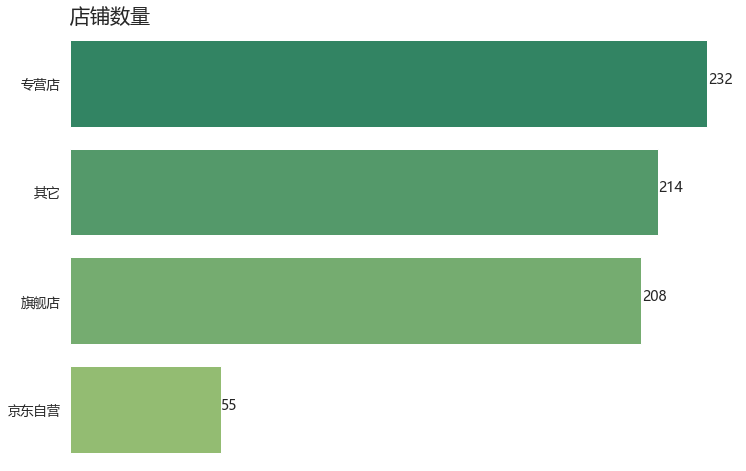

In [18]:
s_group = df.groupby('newgroup').shopname.nunique().reset_index(name='counts')
s_group.sort_values(by='counts',ascending=False,inplace=True)
 
plt.figure(figsize=(12,8))
sns.barplot(x='counts',y='newgroup',data=s_group)
con = list(s_group['counts'])
con=sorted(con,reverse=True)
for x,y in enumerate(con):
    plt.text(y+0.1,x,'%s' %y,size=14)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.grid(False) 
plt.box(False)
plt.title('店铺数量',loc='left',fontsize=20)
plt.show()

2.2 绘制店铺类型的百分比

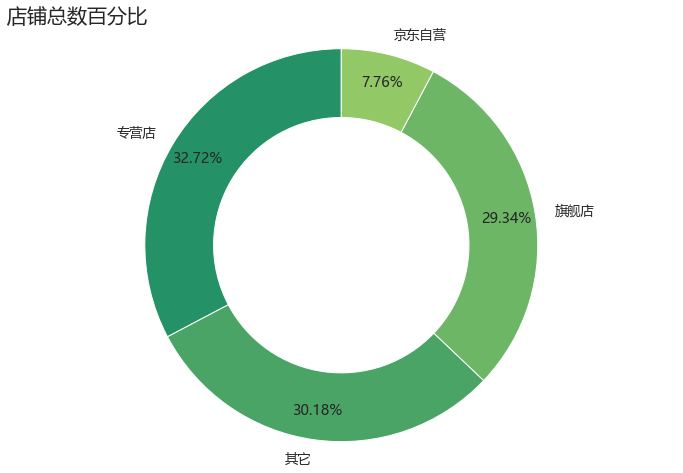

In [19]:
plt.figure(figsize=(12,8))
size = s_group['counts']
labels = s_group['newgroup']
plt.pie(size,labels=labels,wedgeprops={'width':0.35,'edgecolor':'w'},
        autopct='%.2f%%',pctdistance=0.85,startangle = 90)
plt.axis('equal')
plt.title('店铺总数百分比',loc='left',fontsize=20)
plt.show()

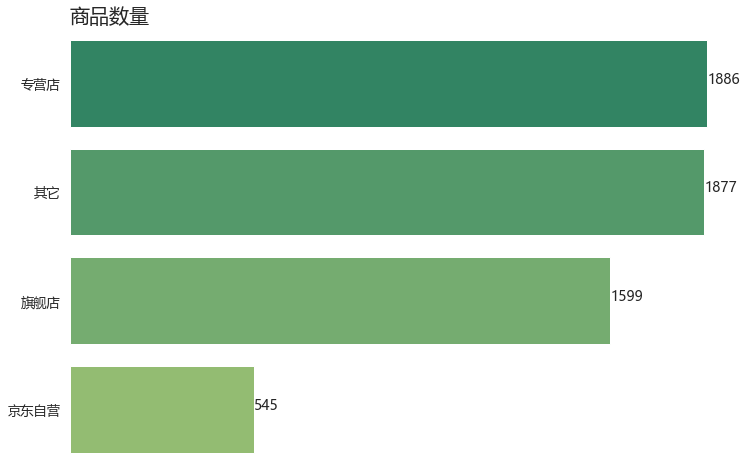

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(y=df['newgroup'],order = df['newgroup'].value_counts().index,data=df)
 
con = list(df['newgroup'].value_counts().values)
con=sorted(con,reverse=True)
for x,y in enumerate(con):
    plt.text(y+0.1,x,'%s' %y,size=14)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.grid(False) 
plt.box(False)
plt.title('商品数量',loc='left',fontsize=20)
plt.show()

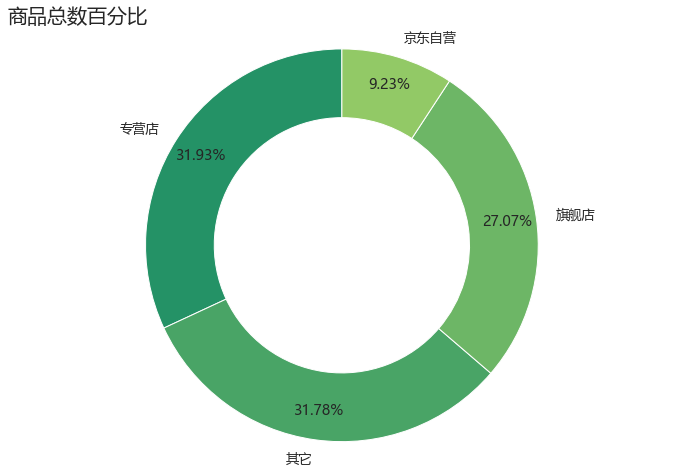

In [21]:
plt.figure(figsize=(12,8))
size = df['newgroup'].value_counts().values
labels = df['newgroup'].value_counts().index
plt.pie(size,labels=labels,wedgeprops={'width':0.35,'edgecolor':'w'},
        autopct='%.2f%%',pctdistance=0.85,startangle = 90)
plt.axis('equal')
plt.title('商品总数百分比',loc='left',fontsize=20)
plt.show()

2.3 查看整体价格分布

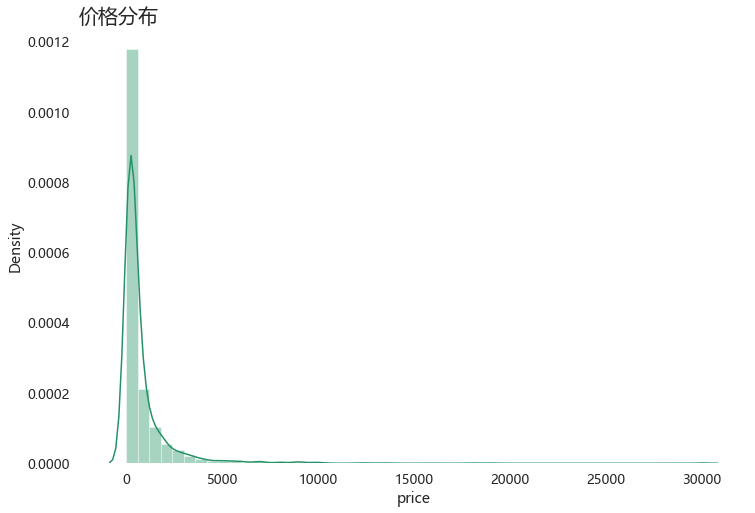

In [22]:
# 整体价格分布
plt.figure(figsize=(12,8))
sns.distplot(df['price'])
plt.title('价格分布',loc='left',fontsize=20)
plt.box(False)
plt.show()


2.4 查看该商品主要集中在哪个价格段

In [23]:
result = df
result['price_cut'] = pd.cut(x=result['price'],bins=[0,100,200,300,400,500,600,800,1000,30000],
                             labels=['100以下','100-200','200-300','300-400','400-500','500-600','600-800','800-1k','1K以上'])

In [24]:
result2 = df[df['price']>=1000]
result2['price_cut'] = pd.cut(x=result['price'],bins=[1000,2000,5000,10000,30000],
                             labels=['1K-2K','2K-5K','5K-1W','1W以上'])
result3 = pd.DataFrame((result2['price_cut'].value_counts()/result.shape[0]).round(3))

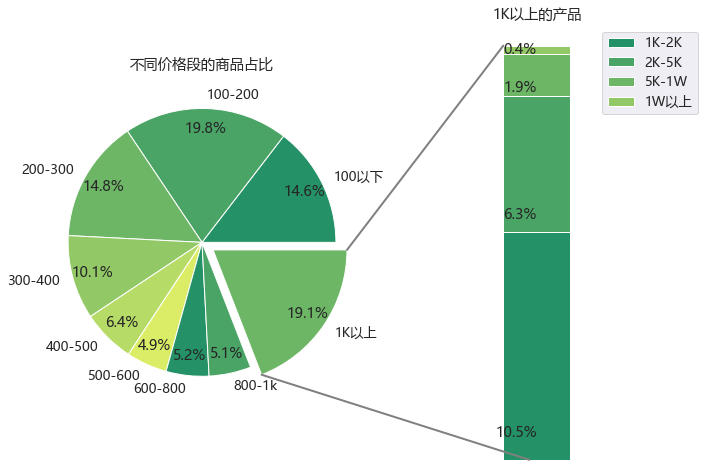

In [25]:
from matplotlib.patches import ConnectionPatch
import numpy as np
 
# make figure and assign axis objects
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)
 
# pie chart parameters
ratios = result.groupby('price_cut').name.count().values
labels = result.groupby('price_cut').name.count().index
explode = [0, 0,0,0,0,0,0,0,0.1]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[8]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode,pctdistance=0.85)
ax1.set_title('不同价格段的商品占比')
 
# bar chart parameters
 
xpos = 0
bottom = 0
ratios = result3.values
width = .2
 
 
for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom)
    ypos = bottom + ax2.patches[j].get_height() / 10
    bottom += height
    ax2.text(xpos, ypos, '%1.1f%%' % (ax2.patches[j].get_height() * 100),
             ha='right')
 
ax2.set_title('1K以上的产品')
ax2.legend((result3.index))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)
 
# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[8].theta1, ax1.patches[8].theta2
center, r = ax1.patches[8].center, ax1.patches[8].r
bar_height = sum([item.get_height() for item in ax2.patches])
 
# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0.5, 0.5, 0.5])
con.set_linewidth(2)
ax2.add_artist(con)
 
# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 9, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0.5, 0.5, 0.5])
ax2.add_artist(con)
con.set_linewidth(2)
 
plt.show()

In [27]:
result4 = result.groupby(['newgroup','price_cut']).name.count().reset_index(name='counts')
result4 = pd.DataFrame(result4)
result4.columns = ['newgroup','price_cut','counts']

In [28]:
percent=pd.pivot_table(result4,index=['newgroup'],columns=['price_cut'])
percent.columns = ['100以下','100-200','200-300','300-400','400-500','500-600','600-800','800-1k','1K以上']
# percent=percent.reset_index()
p_percent=percent.div(percent.sum(axis=1), axis=0)*100
p_percent=p_percent.reset_index()

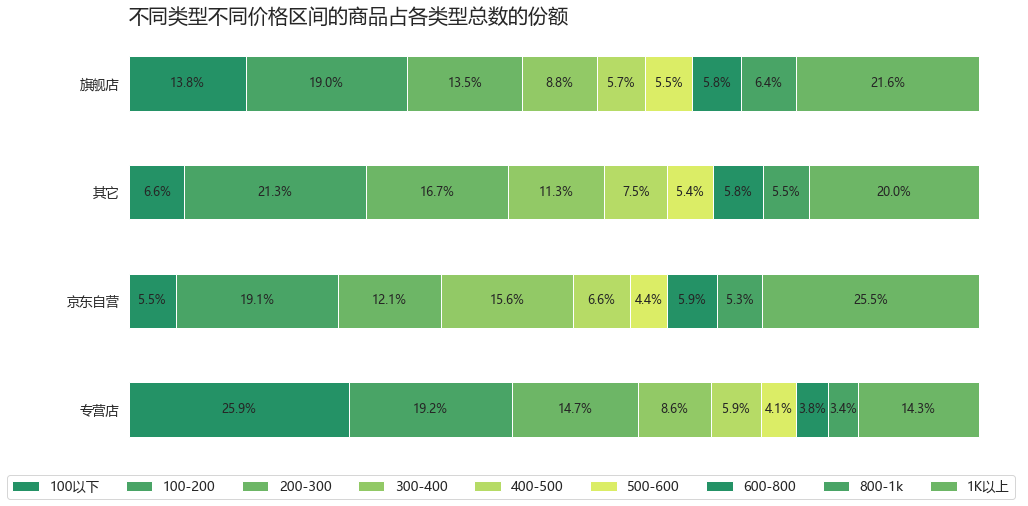

In [29]:
p_percent.plot(x = 'newgroup', kind='barh',stacked = True,mark_right = True,figsize=(16,8))
df_rel=p_percent[p_percent.columns[1:]]

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(p_percent.iloc[:, 1:].cumsum(1)[n], p_percent[n], df_rel[n])):
        plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center',size=12)

plt.title('不同类型不同价格区间的商品占各类型总数的份额',loc='left',fontsize=20)
plt.legend(bbox_to_anchor=(1, -0.01),ncol=10,facecolor='None')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.grid(False) 
plt.box(False)
plt.show()

2.5 累计成交量
这里的累计成交量是：因为京东上的商品只要交易成功不管是否评价，系统都会记录评价人数，因此忽略时效的问题，可当作累计成交来看，只看大概的别纠结哈

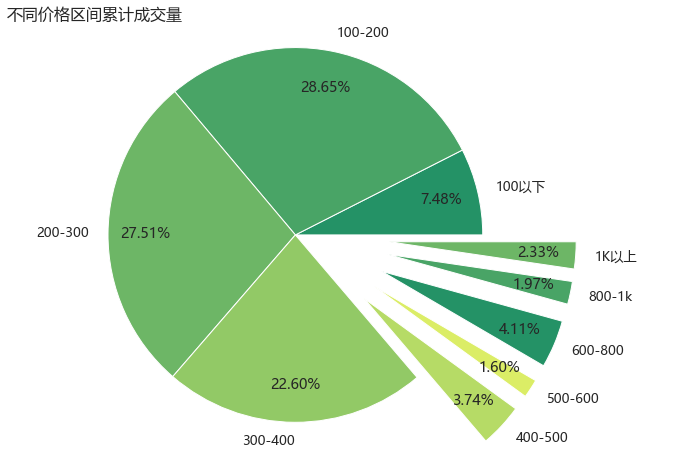

In [30]:
result7 = result.groupby('price_cut').new_comment.sum().reset_index(name='total_comment')
plt.figure(figsize=(12,8))
size = result7['total_comment']
labels = result7['price_cut']
plt.pie(size,labels=labels,
        autopct='%.2f%%',pctdistance=0.8,explode=[0,0,0,0,0.5,0.5,0.5,0.5,0.5])
plt.title('不同价格区间累计成交量',loc='left',fontsize=16)
plt.axis('equal')
plt.show()

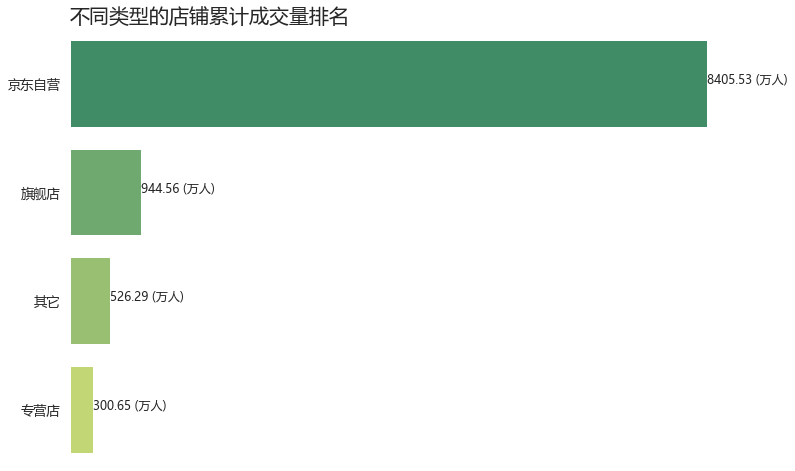

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(x=(result.groupby('newgroup').new_comment.sum().sort_values(ascending=False).values/10000).round(2),
            y=result.groupby('newgroup').new_comment.sum().sort_values(ascending=False).index,
           data=result,palette='summer')
con = list((result.groupby('newgroup').new_comment.sum().sort_values(ascending=False).values/10000).round(2))
# con=sorted(con,reverse=True)
for x,y in enumerate(con):
    plt.text(y+0.1,x,'%s (万人)' %y,size=12)
plt.grid(False) 
plt.box(False)
plt.xticks([])
plt.ylabel('')
plt.title('不同类型的店铺累计成交量排名',loc='left',fontsize=20)
plt.show()


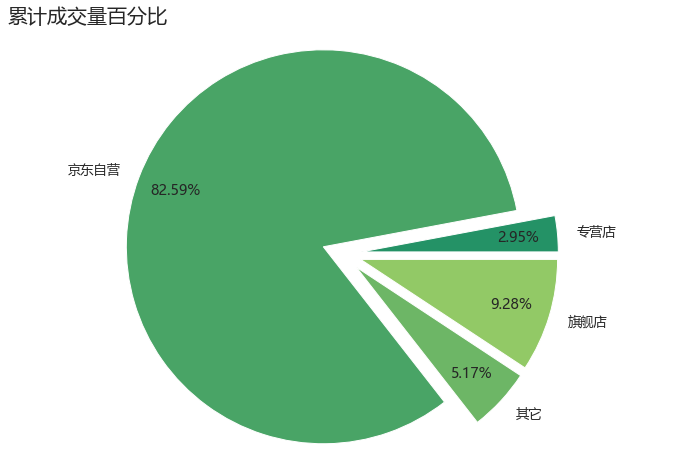

In [32]:
plt.figure(figsize=(12,8))
size = result.groupby('newgroup').new_comment.sum()
labels = size.index
plt.pie(size.values,labels=labels,autopct='%.2f%%',pctdistance=0.8,explode=[0.1,0.1,0.1,0.1])
plt.axis('equal')
plt.title('累计成交量百分比',loc='left',fontsize=20)
plt.show()

In [33]:
result5 = result.groupby(['newgroup','price_cut']).new_comment.sum().reset_index(name='total_comment')

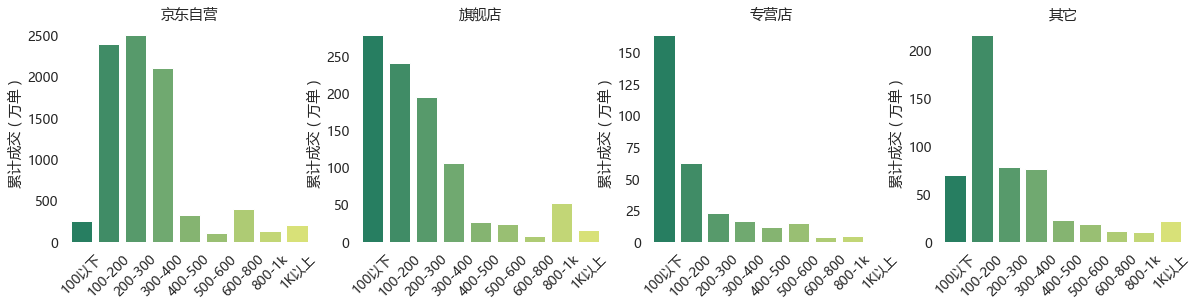

In [34]:
plt.figure(figsize=(20,4))
n = 0
for x in ['京东自营','旗舰店','专营店','其它']:
    df = result5[result5['newgroup']==x]
    n+=1
    plt.subplot(1,4,n)
    sns.barplot(x='price_cut',y=df['total_comment']/10000,data=df,palette='summer')
    plt.title(x)
    plt.xlabel('')
    plt.ylabel('累计成交 ( 万单 )')
    plt.xticks(rotation=45)
    plt.grid(False) 
    plt.box(False)
plt.show()


In [ ]:
### 小结
自营类店铺以不到 10%的商品数量赢得了超过 80% 的成交量

超过 90%的非自营类店铺需要竞争被剩下的不到 20%的资源,

更可怕的是超 30 % 的专营店类店铺只能瓜分剩下不到 3% 的成交量